In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# - Data Understanding

In [2]:
train = pd.read_csv('train.csv.zip')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv.zip')

In [3]:
print(train.shape)
train.columns

(421570, 5)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [4]:
print(stores.shape)
stores.columns

(45, 3)


Index(['Store', 'Type', 'Size'], dtype='object')

In [5]:
print(features.shape)
features.columns

(8190, 12)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [6]:
Data = train.merge(stores, how='left').merge(features, how='left')

Data['Date'] = pd.to_datetime(Data['Date'])
Data['Year'] = pd.to_datetime(Data['Date']).dt.year
Data['Month'] = pd.to_datetime(Data['Date']).dt.month
Data['Week'] = pd.to_datetime(Data['Date']).dt.week
Data['DayOfTheMonth'] = pd.to_datetime(Data['Date']).dt.day

Data = Data.sort_values(by='Date')

In [7]:
Data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,2010,2,5,5


In [8]:
Data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,2012,10,43,26
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,2012,10,43,26
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,2012,10,43,26
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,2012,10,43,26
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,2012,10,43,26


In [9]:
Data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,25.826762,15.673131
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,14.151887,8.753549
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,14.000000,8.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,26.000000,16.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,38.000000,23.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000,31.000000


In [10]:
Data.shape

(421570, 20)

In [11]:
Data.dtypes

Store                     int64
Dept                      int64
Date             datetime64[ns]
Weekly_Sales            float64
IsHoliday                  bool
Type                     object
Size                      int64
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
Year                      int64
Month                     int64
Week                      int64
DayOfTheMonth             int64
dtype: object

# - Business Understanding

# - Prepare Data

In [12]:
Data.isna().sum()

Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Type                  0
Size                  0
Temperature           0
Fuel_Price            0
MarkDown1        270889
MarkDown2        310322
MarkDown3        284479
MarkDown4        286603
MarkDown5        270138
CPI                   0
Unemployment          0
Year                  0
Month                 0
Week                  0
DayOfTheMonth         0
dtype: int64

In [13]:
Data['CPI'] = Data['CPI'].fillna(Data['CPI'].mean())
Data['Unemployment'] = Data['Unemployment'].fillna(Data['Unemployment'].mean())

#del Data['MarkDown1']
#del Data['MarkDown2']
#del Data['MarkDown3']
#del Data['MarkDown4']
#del Data['MarkDown5']

Data['MarkDown1'] = Data['MarkDown1'].fillna(0)
Data['MarkDown2'] = Data['MarkDown2'].fillna(0)
Data['MarkDown3'] = Data['MarkDown3'].fillna(0)
Data['MarkDown4'] = Data['MarkDown4'].fillna(0)
Data['MarkDown5'] = Data['MarkDown5'].fillna(0)

In [14]:
Data.isna().sum()

Store            0
Dept             0
Date             0
Weekly_Sales     0
IsHoliday        0
Type             0
Size             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Year             0
Month            0
Week             0
DayOfTheMonth    0
dtype: int64

In [15]:
Data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [16]:
Type_Cat=pd.get_dummies(Data['Type'])
Data=pd.concat([Data,Type_Cat],axis=1)
Data.drop('Type',axis=1,inplace=True)
Data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth,A,B,C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5,1,0,0
277665,29,5,2010-02-05,15552.08,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
277808,29,6,2010-02-05,3200.22,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
277951,29,7,2010-02-05,10820.05,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
278094,29,8,2010-02-05,20055.64,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0


# - Data Modeling

In [17]:
X=Data.drop(columns=['Weekly_Sales','Date'])
y=Data['Weekly_Sales']
print(X.shape)
print(y.shape)

(421570, 20)
(421570,)


In [18]:
x_train = X.iloc[0:337256] # 80%
x_test = X.iloc[337256:] # 20%
y_train = y.iloc[0:337256] # 80%
y_test = y.iloc[337256:] # 20%
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [19]:
#x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(337256, 20)
(84314, 20)
(337256,)
(84314,)


In [21]:
x_train.head(100)

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth,A,B,C
0,1,1,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5,1,0,0
277665,29,5,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
277808,29,6,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
277951,29,7,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
278094,29,8,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267695,28,6,False,206302,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,2010,2,5,5,1,0,0
267838,28,7,False,206302,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,2010,2,5,5,1,0,0
267981,28,8,False,206302,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,2010,2,5,5,1,0,0
268124,28,9,False,206302,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,2010,2,5,5,1,0,0


In [22]:
y_train.shape

(337256,)

In [23]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [24]:
mea = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)
x_train = (x_train-mea)/std
x_test = (x_test-mea)/std

In [25]:
x_train.shape

(337256, 20)

KNN Algorithm

In [26]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the model and fit to training data
k = 10
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)

# Make predictions on test data
y_pred = knn.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 315977824.0


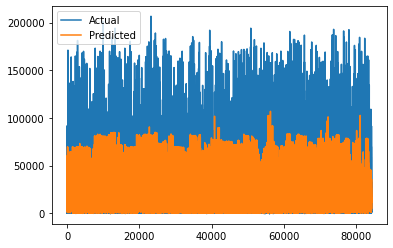

In [27]:
# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Adaboost

Mean Squared Error: 740771625.5174774


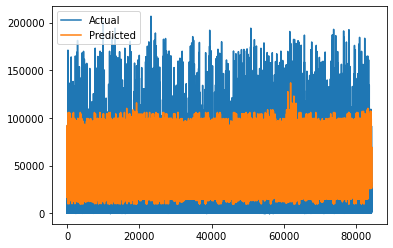

In [30]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(x_train, y_train)

# Make predictions on test data
y_pred = ada.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

bagging regressor

Mean Squared Error: 13732625.045281712


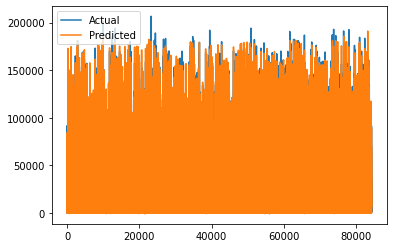

In [31]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(n_estimators=100)
bagging.fit(x_train, y_train)

# Make predictions on test data
y_pred = bagging.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Extra tree regressor

Mean Squared Error: 12050866.20758357


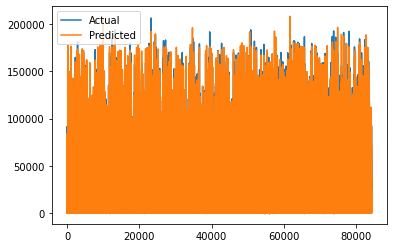

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor(n_estimators=100)
extra.fit(x_train, y_train)

# Make predictions on test data
y_pred = extra.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the model and fit to training data
svm = SVR(kernel='rbf', C=1, gamma='auto')
svm.fit(x_train, y_train)

# Make predictions on test data
y_pred = svm.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Gradient Boosting Algorithm

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Create the GBM model
model = GradientBoostingRegressor(loss='huber', n_estimators=1000, learning_rate=0.1)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot the actual and predicted values

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

**random forest **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Create Random Forests regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the full training set
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Plot the actual and predicted values

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()